## Import libraries

In [23]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load and filter data

In [24]:
df_initial = pd.read_csv('Ice_Cream_Sales-Temperatures.csv')
df_initial.head()

,Temperature (F),Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


Replace Fahrenheit with Celsius

In [25]:
df = df_initial.copy()
df['Temperature (F)'] = df['Temperature (F)'].apply(lambda F: 5/9*(F-32))
df.rename(columns={'Temperature (F)': 'TemperatureCelsius'}, inplace=True)
df.rename(columns={'Ice Cream Profits': 'IceCreamProfits'}, inplace=True)
df.head()

,TemperatureCelsius,IceCreamProfits
0,3.888889,13.17
1,4.444444,11.88
2,5.000000,18.82
3,5.555556,18.65
4,6.111111,17.02


In [26]:
df.describe()

,TemperatureCelsius,IceCreamProfits
count,365.000000,365.000000
mean,22.211568,52.103616
std,7.365839,15.989004
min,3.888889,11.880000
25%,17.222222,40.650000
50%,22.777778,53.620000
75%,27.777778,63.630000
max,38.333333,89.290000


## Vizualize data

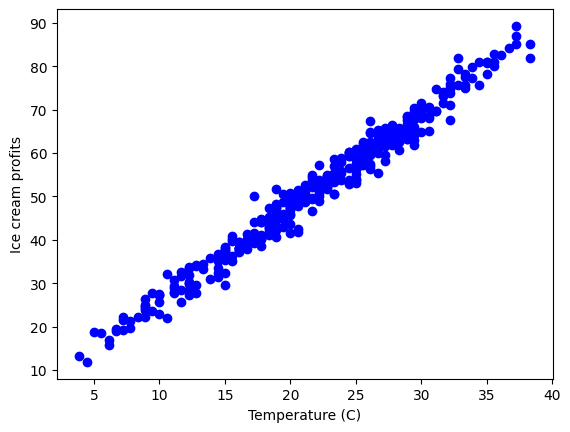

In [27]:
plt.scatter(df.TemperatureCelsius, df.IceCreamProfits, color = 'blue')
plt.xlabel("Temperature (C)")
plt.ylabel("Ice cream profits")
plt.show()

## Split data into train and test sets

In [28]:
msk = np.random.rand(len(df)) < 0.8
train_set = df[msk]
test_set = df[~msk]

## Train the model

In [29]:
# Create the model
model = linear_model.LinearRegression()

# Create feature and target arrays
X_train = np.asanyarray(train_set[['TemperatureCelsius']])
Y_train = np.asanyarray(train_set[['IceCreamProfits']])

# Fit the model
model.fit(X_train, Y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[2.14610254]]
Intercept: [4.39100604]


## Vizualize the model

Text(0, 0.5, 'Ice cream profits')

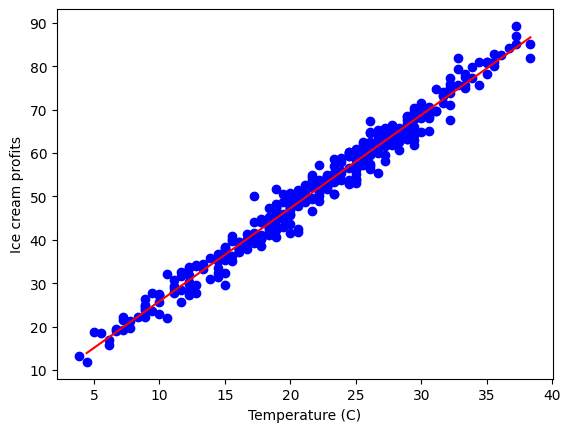

In [30]:
plt.scatter(df.TemperatureCelsius, df.IceCreamProfits, color = 'blue')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], color = 'red')
plt.xlabel("Temperature (C)")
plt.ylabel("Ice cream profits")

## Test the model

In [32]:
X_test = np.asanyarray(test_set[['TemperatureCelsius']])
Y_test = np.asanyarray(test_set[['IceCreamProfits']])
Y_predict = model.predict(X_test)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(Y_predict - Y_test)))
print("Mean Squared Erroe: %.2f" % np.mean((Y_predict - Y_test)**2))
print("R2-score: %.2f" % r2_score(Y_predict, Y_test))

Mean Absolute Error: 2.10
Mean Squared Erroe: 7.33
R2-score: 0.97


## Make prediction for new data

In [ ]:
new_data = np.array([[-2]])
prediction = model.predict(new_data)

print("Engine size: ", new_data)
print("CO2 emission prediction: %.2f" % prediction)